# Ejercicio de análisis de datos

El archivo adjunto [`datos.csv`](./datos.csv) contiene los registros de experimentos realizados con un grupo de microorganismos diferentes durante el año 2020.

Cada columna contiene los valores correspondientes a los parámetros y resultados codificados que se indican como encabezado de la misma.

El organismo está identificado por la columna `OrgID`.

La `Fecha` está indicada en el formato `dd/mm/aaaa`.

Todos los valores a partir de la cuarta columna (parámetro `P001_G`) son números positivos o valores en blanco.

Crear programas en Python para:

# Paso 0. Leer los datos

Esto no lo solicita el ejercicio, pero es obvio que lo necesitamos hacer.

In [1]:
archivo = "datos.csv"
with open(archivo) as f:
    datos = f.readlines()

# El primer renglón contiene los nombres de las columnas
columnas = datos[0]
# Quitar el carácter nueva línea del final y convertirlo en lista
columnas = columnas.strip().split(",")

# El resto de los renglones son los datos en sí
datos = datos[1:]

# Hasta aquí, tenemos las columnas como lista:
print("Columnas:")
print(columnas)
print()

# Y los datos como una lista de renglones separados por comas:
print("Ejemplo de datos:")
print(datos[0])
print(datos[1])

Columnas:
['Fecha', 'Tipo', 'OrgID', 'P001_G', 'P002_G', 'P003_G', 'P021_G', 'P002_X', 'P003_X', 'P005_X', 'P021_X', 'SuCa', 'D107', 'O002', 'D071', 'O008', 'D002', 'O001', 'O007', 'O004', 'D001', 'D004_FAP', 'D004_FAT', 'D009', 'D019', 'D004_CAA', 'O999_CAR', 'O999_CAP', 'D004_CAPP', 'O999_CAV', 'D004_CAPV', 'O999_CARe', 'O999_FAI', 'O999_FAP', 'O999_FAT']

Ejemplo de datos:
06/01/2020,E,235,5574.51,,,,71.99,,,643.63,,,,,,629,,,,,,,,,,,,,,,,,,

06/01/2020,E,235,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,12.92,2393.54,2393.54



In [2]:
# Vamos a separar los datos también en columnas
datos = [linea.strip().split(",") for linea in datos]
print(datos[0])
print(datos[1])

['06/01/2020', 'E', '235', '5574.51', '', '', '', '71.99', '', '', '643.63', '', '', '', '', '', '629', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['06/01/2020', 'E', '235', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '12.92', '2393.54', '2393.54']


Pero hay un detalle: Más adelante nos piden hacer sumas de los datos, gráficas, etc.
y los datos que tenemos son texto, hay que convertirlos a números (solo *a partir de la cuarta columna*, lo menciona el enunciado).

Otro detalle, hay valores faltantes (vacíos o nulos), esos no los podemos convertir a número, da error.

Podemos tomar varias opciones. Una opción (sencilla) sería convertir los datos faltantes a 0. Pero se observan valores de 0 en los datos, por lo que suponemos que no es lo mismo un valor de 0 que un dato faltante. Si cambiamos los datos faltantes a 0, después no vamos a poder distinguir los ceros originales de los que nosotros introdujimos con el programa.

La opción que vamos a tomar es dejar los datos en blanco tal como están. Esto va a dificultar un poco el código posterior porque antes de hacer, por ejemplo, las sumas, vamos a tener que verificar si tenemos el dato a sumar.

In [3]:
datos_txt = datos[:]
datos = []
for linea in datos_txt:
    nueva_linea = linea[:3]
    for dato in linea[3:]:
        if dato:
            # Si el valor no está vacío, convertirlo a número
            dato = float(dato)
        nueva_linea.append(dato)
    datos.append(nueva_linea)
print("Ejemplo de datos:")
print(datos[0])
print(datos[1])

Ejemplo de datos:
['06/01/2020', 'E', '235', 5574.51, '', '', '', 71.99, '', '', 643.63, '', '', '', '', '', 629.0, '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['06/01/2020', 'E', '235', 0.0, '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 12.92, 2393.54, 2393.54]


# Inciso 1. Lista de organismos

1. Obtener una lista de los diferentes organismos utilizados.

La estrategia de solución va a ser ir anotando los organismos en una lista. Recorremos la lista de datos (renglón por renglón), vemos de qué organismo se trata y, si aún no lo tenemos registrado, lo añadimos a la lista.

In [4]:
# OrgID es la tercera columna
organismos = []
for linea in datos:
    org_id = linea[2]
    if org_id not in organismos:
        organismos.append(org_id)

print("Organismos:")
print(organismos)

Organismos:
['235', '1', '4', '7', '11', '24', '31', '39', '75', '136', '220', '231', '236', '245']


In [5]:
# Nomás por no dejar, vamos a dejar la lista en orden (¿obsesivo?)  ;-)
organismos.sort(key=lambda x: int(x))
print("Organismos:")
print(organismos)

Organismos:
['1', '4', '7', '11', '24', '31', '39', '75', '136', '220', '231', '235', '236', '245']


# Inciso 2. Sumas `PG` y `PX`

2. Sumar, para cada microorganismo, los totales de los parámetros `PG` y `PX`. Los parámetros `PG` se refieren a las columnas que inician con la letra `P` y terminan en `_G`. Los parámetros `PX` se refieren a las columnas que inician con `P` y terminan con `_X`. Los nombres de las columnas no deben codificarse de manera estática en el programa, sino que el mismo programa debe generar la lista de los parámetros que pertenecen a cada categoría. ***Tip***: La clase `str` posee métodos `.startswith` y `.endswith`... o puede, simplemente, usarse *slicing*.

Para este tipo de situaciones, datos organizados en columnas, la estructura más versátil en Python es el `dataframe` de `pandas`, pero no es materia del curso. De hecho, explorar la biblioteca `pandas` ameritaría un curso completo. Lo cual no quiere decir que sea difícil de aprender y que no se pueda ir explorando poco a poco, conforme se necesita. Solo quiere decir que es muy extensa.

Les voy a presentar una solución en `pandas` y luego exploramos otra solución con las estructuras más básicas de Python.

In [6]:
import pandas as pd
datos_df = pd.read_csv(archivo)
datos_df.head()

,Fecha,Tipo,OrgID,P001_G,P002_G,P003_G,P021_G,P002_X,P003_X,P005_X,...,D004_CAA,O999_CAR,O999_CAP,D004_CAPP,O999_CAV,D004_CAPV,O999_CARe,O999_FAI,O999_FAP,O999_FAT
0,06/01/2020,E,235,5574.51,NaN,NaN,NaN,71.99,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/01/2020,E,235,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.92,2393.54,2393.54
2,07/01/2020,E,1,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.07,1421.21,1421.21
3,07/01/2020,E,4,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.93,1417.84,1417.84
4,07/01/2020,E,7,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.40,1852.90,1852.90


In [7]:
# Identificar cuáles son las columnas PG y PX
columnas_pg = []
columnas_px = []

for col in columnas:
    # Las columnas PG comienzan con "P" y terminan con "_G"
    if col[0] == "P" and col[-2:] == "_G":
        columnas_pg.append(col)
    # Las columnas PX comienzan con "P" y terminan con "_X"
    elif col[0] == "P" and col[-2:] == "_X":
        columnas_px.append(col)
print("Columnas PG:", columnas_pg)
print("Columnas PX:", columnas_px)

Columnas PG: ['P001_G', 'P002_G', 'P003_G', 'P021_G']
Columnas PX: ['P002_X', 'P003_X', 'P005_X', 'P021_X']


In [8]:
# Crear nuevas columnas con las sumas correspondientes
datos_df["PG"] = datos_df[columnas_pg].sum(axis=1)
datos_df["PX"] = datos_df[columnas_px].sum(axis=1)
datos_df[columnas_pg + ["PG"] + columnas_px + ["PX"]]

,P001_G,P002_G,P003_G,P021_G,PG,P002_X,P003_X,P005_X,P021_X,PX
0,5574.51,NaN,NaN,NaN,5574.51,71.99,NaN,NaN,643.63,715.62
1,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00
2,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00
3,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00
4,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...
724,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00
725,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00
726,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00
727,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00


In [9]:
# Agruparlas por organismo
datos_df.groupby("OrgID")[["PG", "PX"]].sum()

,PG,PX
OrgID,,
1,25669.63,3476.94
4,44840.55,6230.47
7,55065.03,6788.18
11,65897.01,7288.29
24,111469.99,8947.15
31,271837.71,14141.28
39,198900.85,10276.97
75,61002.65,7220.25
136,46577.48,6521.07


Esa es la solución usando `pandas`. Es sencilla, la parte propia de `pandas` se resume a cuatro líneas: la lectura del archivo (`read_csv`), la creación de las dos columnas extra sumando un subconjunto de columnas (`sum`) y la agrupación de las líneas por `OrgID` (`groupby`).

Sin embargo, como ya les he comentado, no es necesario. Todos los problemas los pueden resolver usando las estructuras de control que estudiamos a detalle en el curso: secuenciales, de decisión y de repetición.

El inicio es similar y ya lo tenemos: identificar las columnas que pertenecen a cada grupo: PG y PX. El detalle aquí es que tenemos los *nombres* de las columnas pero los datos los tenemos en una lista de listas y los elementos de las listas no se identifican por nombre sino por posición. Podríamos volver a construir la lista de las columnas para guardar el número de la columna en lugar de (o adicionalmente a) su nombre, usando `enumerate`. 

```python
for indice, col in enumerate(columnas):
    # Las columnas PG comienzan con "P" y terminan con "_G"
    if col[0] == "P" and col[-2:] == "_G":
        columnas_pg.append(indice)
    # Las columnas PX comienzan con "P" y terminan con "_X"
    elif col[0] == "P" and col[-2:] == "_X":
        columnas_px.append(indice)
```

El uso de índices no es, en general, muy "pythonesco". Lo que vamos a hacer mejor es utilizar `zip` para "emparejar" los nombres de las columnas conforme las vayamos recorriendo en cada renglón de datos.

In [10]:
# Las variables columnas_pg y columnas_px ya se definieron en el
# ejemplo anterior en que se usó pandas.
# Ahora, hay que sumar los valores en esas columnas y guardar el total separado
# para cada organismo.
# Vamos a usar un diccionario para eso (en realidad, un diccionario de diccionarios).
# Primero, inicializamos todos los valores en 0.
valores_pg_y_px = {}
for org_id in organismos:
    valores_pg_y_px[org_id] = {"PG": 0, "PX": 0}
# Y ahora, vamos sumando
for linea in datos:
    org_id = linea[2]
    suma_pg = 0
    suma_px = 0
    for dato, col in zip(linea, columnas):
        if col in columnas_pg:
            if dato:
                suma_pg += dato
        elif col in columnas_px:
            if dato:
                suma_px += dato
    # Acumular las sumas para el organismo
    valores_pg_y_px[org_id]["PG"] += suma_pg
    valores_pg_y_px[org_id]["PX"] += suma_px
# Mostrar los resultados
for org_id in valores_pg_y_px:
    print(f"{org_id:>3}: PG={valores_pg_y_px[org_id]['PG']:10,.2f}   PX={valores_pg_y_px[org_id]['PX']:9,.2f}")

  1: PG= 25,669.63   PX= 3,476.94
  4: PG= 44,840.55   PX= 6,230.47
  7: PG= 55,065.03   PX= 6,788.18
 11: PG= 65,897.01   PX= 7,288.29
 24: PG=111,469.99   PX= 8,947.15
 31: PG=271,837.71   PX=14,141.28
 39: PG=198,900.85   PX=10,276.97
 75: PG= 61,002.65   PX= 7,220.25
136: PG= 46,577.48   PX= 6,521.07
220: PG= 84,094.76   PX= 7,958.64
231: PG= 57,160.96   PX= 6,737.79
235: PG=  6,597.17   PX= 2,018.82
236: PG= 58,091.83   PX= 6,715.62
245: PG= 32,877.66   PX= 4,781.11


Que son los mismos resultados obtenidos anteriormente.

# Inciso 3. Gráfica

3. Crear una gráfica del resultado `D002` contra el parámetro `P001_G`.

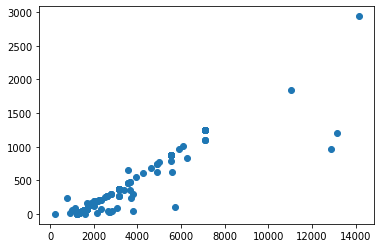

In [11]:
import matplotlib.pyplot as plt
# Recuperar cada columna en una lista
col_p001_g = []
col_d002 = []
# Índice de cada columna
for i, col in enumerate(columnas):
    if col == "P001_G":
        col_p001_g_id = i
    elif col == "D002":
        col_d002_id = i
# Rellenar listas
for linea in datos:
    if linea[col_p001_g_id] and linea[col_d002_id]:
        col_p001_g.append(linea[col_p001_g_id])
        col_d002.append(linea[col_d002_id])
# Graficar
plt.plot(col_p001_g, col_d002, "o")
plt.show()

La solución equivalente usando el `dataframe` de `pandas` sería:

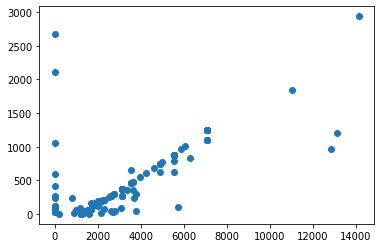

In [12]:
plt.plot(datos_df["P001_G"], datos_df["D002"], "o")
plt.show()

# Inciso 4. Filtrar registros

4. Extraer, para el `OrgID=220`, la información de los registros que presentan valores (diferentes de cero) para las columnas `PX`. Excluir de este análisis el parámetro (columna) `P005_X`. Reportar la fecha y los valores individuales de los parámetros `PX` (`P001_X`, `P002_X`, `P003_X`, etc.), así como el total `PX`.

In [13]:
# Excluir columna P005_X de las columnas PX
columnas_px_sin_005 = columnas_px[:]
if "P005_X" in columnas_px_sin_005:
    columnas_px_sin_005.remove("P005_X")
# Vamos a recorrer la lista buscando renglones que:
#  1. Tengan OrgID=220
#  2. Al menos una columna PX tenga un valor diferente de 0
# Cada que encontremos un renglón, vamos a guardar:
#  a. Fecha
#  b. Valor de cada columna PX
#  c. Total de columnas PX
# Vamos a usar un diccionario para guardar los valores PX (para poder guardarlos por nombre)
valores_px_vacios = {}
for col in columnas_px_sin_005:
    valores_px_vacios[col] = 0
valores_px_vacios["PX"] = 0

org_220_x = []
for linea in datos:
    if linea[2] == "220":
        valores_px = valores_px_vacios.copy()
        suma_px = 0
        for col, valor in zip(columnas, linea):
            if col in columnas_px_sin_005:
                valores_px[col] = valor
                if valor:
                    suma_px += valor
        valores_px["PX"] = suma_px
        # Si hubo un valor PX diferente de 0, añadir registro
        if suma_px:
            org_220_x.append({linea[0]: valores_px})

# Mostrar resultados
for registro in org_220_x:
    print(registro)

{'02/04/2020': {'P002_X': '', 'P003_X': '', 'P021_X': 720.0, 'PX': 720.0}}
{'21/05/2020': {'P002_X': '', 'P003_X': 1303.2, 'P021_X': '', 'PX': 1303.2}}
{'17/12/2020': {'P002_X': 2606.4, 'P003_X': '', 'P021_X': '', 'PX': 2606.4}}
{'18/12/2020': {'P002_X': '', 'P003_X': '', 'P021_X': 583.2, 'PX': 583.2}}


Por no dejar, la solución equivalente en `pandas` es:

In [14]:
filtro_orgid = datos_df["OrgID"]==220
filtro_px = datos_df[columnas_px_sin_005].sum(axis=1)!=0
datos_df[filtro_orgid & filtro_px][["Fecha"] + columnas_px_sin_005 + ["PX"]]

,Fecha,P002_X,P003_X,P021_X,PX
203,02/04/2020,NaN,NaN,720.0,720.0
292,21/05/2020,NaN,1303.2,NaN,1303.2
699,17/12/2020,2606.4,NaN,NaN,2606.4
717,18/12/2020,NaN,NaN,583.2,583.2
